# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\watso\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()

True

In [3]:
# Set News API Key
api_key=os.environ["NEWS_API_KEY"]

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
btc_news_en["totalResults"]

7990

In [6]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
btc_news_df = create_df(btc_news_en["articles"], "en")
btc_news_df.head()

,title,description,text,date,language
0,"As Kazakhstan Descends into Chaos, Crypto Mine...",The central Asian country became No. 2 in the ...,When Denis Rusinovich set up cryptocurrency mi...,2022-01-12,en
1,The International Monetary Fund tells El Salva...,The International Monetary Fund’s executive di...,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,en
2,Jack Dorsey’s Block is working to make Bitcoin...,Block is working on building an “open Bitcoin ...,Were officially building an open Bitcoin minin...,2022-01-14,en
3,DeepDotWeb operator sentenced to eight years f...,"The operator of DeepDotWeb, a site that indexe...",Israeli national Tal Prihar pled guilty to rou...,2022-01-27,en
4,Crypto.com admits over $30 million stolen by h...,Cryptocurrency exchange Crypto.com has said th...,"In a new blog post the company said that 4,836...",2022-01-20,en


In [8]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
eth_news_en["totalResults"]

3729

In [9]:
eth_news_df = create_df(eth_news_en["articles"], "en")
eth_news_df.head()

,title,description,text,date,language
0,Crypto.com admits over $30 million stolen by h...,Cryptocurrency exchange Crypto.com has said th...,"In a new blog post the company said that 4,836...",2022-01-20,en
1,Hackers Launder $15 Million Stolen From Crypto...,Hackers who made off with roughly $15 million ...,Hackers who made off with roughly $15 million ...,2022-01-19,en
2,Eric Adams Is Taking His First Paycheck in Crypto,"Mr. Adams, who wants New York City to become t...","On some level, the new mayor is simply employi...",2022-01-20,en
3,Robinhood opens cryptocurrency wallet to beta ...,"Back in September\r\n, Robinhood announced pla...","Back in September\r\n, Robinhood announced pla...",2022-01-21,en
4,Crypto.com Finally Acknowledges $34 Million St...,Trading platform Crypto.com lost about $34 mil...,Trading platform Crypto.com lost about $34 mil...,2022-01-20,en


In [10]:
## Sentiment function

def return_sentiment_df(news_articles):
    empty_list = []
    for article in news_articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            empty_list.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(empty_list)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df

# # Sentiment calculation based on compound score
# def get_sentiment(score):
#     """
#     Calculates the sentiment based on the compound score.
#     """
#     result = 0  # Neutral by default
#     if score >= 0.05:  # Positive
#         result = 1
#     elif score <= -0.05:  # Negative
#         result = -1

#     return result

# def return_sentiment_df_2(news_en_df):
#     # Sentiment scores dictionaries
#     title_sent = {
#         "title_compound": [],
#         "title_pos": [],
#         "title_neu": [],
#         "title_neg": [],
#         "title_sent": [],
#     }
#     text_sent = {
#         "text_compound": [],
#         "text_pos": [],
#         "text_neu": [],
#         "text_neg": [],
#         "text_sent": [],
#     }

#     # Get sentiment for the text and the title
#     for index, row in news_en_df.iterrows():
#         try:
#             # Sentiment scoring with VADER
#             title_sentiment = analyzer.polarity_scores(row["title"])
#             title_sent["title_compound"].append(title_sentiment["compound"])
#             title_sent["title_pos"].append(title_sentiment["pos"])
#             title_sent["title_neu"].append(title_sentiment["neu"])
#             title_sent["title_neg"].append(title_sentiment["neg"])
#             title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

#             text_sentiment = analyzer.polarity_scores(row["text"])
#             text_sent["text_compound"].append(text_sentiment["compound"])
#             text_sent["text_pos"].append(text_sentiment["pos"])
#             text_sent["text_neu"].append(text_sentiment["neu"])
#             text_sent["text_neg"].append(text_sentiment["neg"])
#             text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
#         except AttributeError:
#             pass

#         # Attaching sentiment columns to the News DataFrame
#     title_sentiment_df = pd.DataFrame(title_sent)
#     text_sentiment_df = pd.DataFrame(text_sent)
#     news_en_df = news_en_df.join(title_sentiment_df).join(text_sentiment_df)

#     return news_en_df


In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
#btc_sentiments = []
# btc_news_en

btc_sentiments = return_sentiment_df(btc_news_en)
btc_sentiments.head()

,date,text,compound,positive,negative,neutral
0,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
1,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
3,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000


In [12]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = return_sentiment_df(eth_news_en)
eth_sentiments.head()

,date,text,compound,positive,negative,neutral
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877


In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiments.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.050560,0.062550,0.037900,0.899550
std,0.376771,0.061657,0.043444,0.063682
min,-0.440400,0.000000,0.000000,0.765000
25%,-0.331550,0.000000,0.000000,0.866250
50%,0.038600,0.054000,0.000000,0.914500
75%,0.328950,0.106750,0.083250,0.934000
max,0.680800,0.185000,0.101000,1.000000


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sentiments.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.194960,0.059850,0.008700,0.931400
std,0.269264,0.067117,0.021502,0.073004
min,-0.102700,0.000000,0.000000,0.783000
25%,0.000000,0.000000,0.000000,0.889750
50%,0.038600,0.043500,0.000000,0.951000
75%,0.421500,0.106000,0.000000,1.000000
max,0.757900,0.217000,0.067000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean postive score. 

Q: Which coin had the highest compound score?

A: Ethereum had the higest compound score. 

Q. Which coin had the highest positive score?

A: Ethereum has the higest postive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""    
    sentence = sent_tokenize(text)
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', text)
   
    # Create a tokenized list of the words
    re_words = word_tokenize(re_clean)
    # Lemmatize words into root words
   
    # Convert the words to lowercase
    tokens_lower = [word.lower() for word in re_words]
    
    # Remove the stop words
    tokens_sw = [word for word in tokens_lower if word not in sw]
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens_sw]    
    
    return tokens

In [18]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bit_token = btc_sentiments.text.apply(tokenizer)
btc_sentiments['bitcoin_tokens'] = bit_token
btc_sentiments.head()

,date,text,compound,positive,negative,neutral,bitcoin_tokens
0,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
1,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
3,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."


In [19]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_token = eth_sentiments.text.apply(tokenizer)
eth_sentiments['ethereum_tokens'] = eth_token
eth_sentiments.head()

,date,text,compound,positive,negative,neutral,ethereum_tokens
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[hacker, made, roughly, million, ethereum, cry..."
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, age, ol..."
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[back, september, robinhood, announced, plan, ..."
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877,"[trading, platform, crypto, com, lost, million..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_bigram_counts = Counter(ngrams(tokenizer(btc_sentiments.text.str.cat()), 2))
print(dict(btc_bigram_counts))

{('denis', 'rusinovich'): 1, ('rusinovich', 'set'): 1, ('set', 'cryptocurrency'): 1, ('cryptocurrency', 'mining'): 1, ('mining', 'company'): 1, ('company', 'maveric'): 1, ('maveric', 'group'): 1, ('group', 'kazakhstan'): 1, ('kazakhstan', 'thought'): 1, ('thought', 'hit'): 1, ('hit', 'jackpot'): 1, ('jackpot', 'next'): 1, ('next', 'door'): 1, ('door', 'china'): 1, ('china', 'russia'): 1, ('russia', 'country'): 1, ('country', 'everything'): 1, ('everything', 'bitcoin'): 1, ('bitcoin', 'char'): 2, ('char', 'el'): 1, ('el', 'salvador'): 3, ('salvador', 'introduced'): 1, ('introduced', 'bitcoin'): 1, ('bitcoin', 'legal'): 1, ('legal', 'tender'): 1, ('tender', 'alongside'): 1, ('alongside', 'u'): 2, ('u', 'dollar'): 2, ('dollar', 'illustration'): 1, ('illustration', 'alex'): 3, ('alex', 'castro'): 3, ('castro', 'verge'): 3, ('verge', 'international'): 1, ('international', 'monetary'): 2, ('monetary', 'fund'): 2, ('fund', 'executive'): 1, ('executive', 'board'): 1, ('board', 'recommended'): 

In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigram_counts = Counter(ngrams(tokenizer(eth_sentiments.text.str.cat()), 2))
print(dict(eth_bigram_counts))

{('new', 'blog'): 2, ('blog', 'post'): 3, ('post', 'company'): 2, ('company', 'said'): 2, ('said', 'eth'): 1, ('eth', 'bitcoin'): 1, ('bitcoin', 'taken'): 1, ('taken', 'illustration'): 1, ('illustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'verge'): 1, ('verge', 'blog'): 1, ('post', 'published'): 1, ('published', 'early'): 1, ('early', 'hour'): 1, ('hour', 'thursday'): 1, ('thursday', 'morning'): 1, ('morning', 'cryptocurrency'): 1, ('cryptocurrency', 'char'): 1, ('char', 'hacker'): 1, ('hacker', 'made'): 1, ('made', 'roughly'): 1, ('roughly', 'million'): 1, ('million', 'ethereum'): 1, ('ethereum', 'crypto'): 1, ('crypto', 'com'): 3, ('com', 'attempting'): 1, ('attempting', 'launder'): 1, ('launder', 'fund'): 1, ('fund', 'called'): 1, ('called', 'ethereum'): 1, ('ethereum', 'mixer'): 1, ('mixer', 'known'): 1, ('known', 'tornado'): 1, ('tornado', 'cash'): 1, ('cash', 'according'): 1, ('according', 'new'): 2, ('new', 'report'): 1, ('report', 'char'): 1, ('char', 'level'): 1, (

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_top_10 = token_count(btc_bigram_counts, 10)
btc_top_10

[(('bitcoin', 'mining'), 4),
 (('mining', 'system'), 4),
 (('el', 'salvador'), 3),
 (('illustration', 'alex'), 3),
 (('alex', 'castro'), 3),
 (('castro', 'verge'), 3),
 (('building', 'open'), 3),
 (('open', 'bitcoin'), 3),
 (('blog', 'post'), 3),
 (('bitcoin', 'char'), 2)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_top_10 = token_count(eth_bigram_counts, 10)
eth_top_10

[(('blog', 'post'), 3),
 (('crypto', 'com'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('new', 'york'), 2),
 (('york', 'city'), 2),
 (('end', 'end'), 2),
 (('ethereum', 'char'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

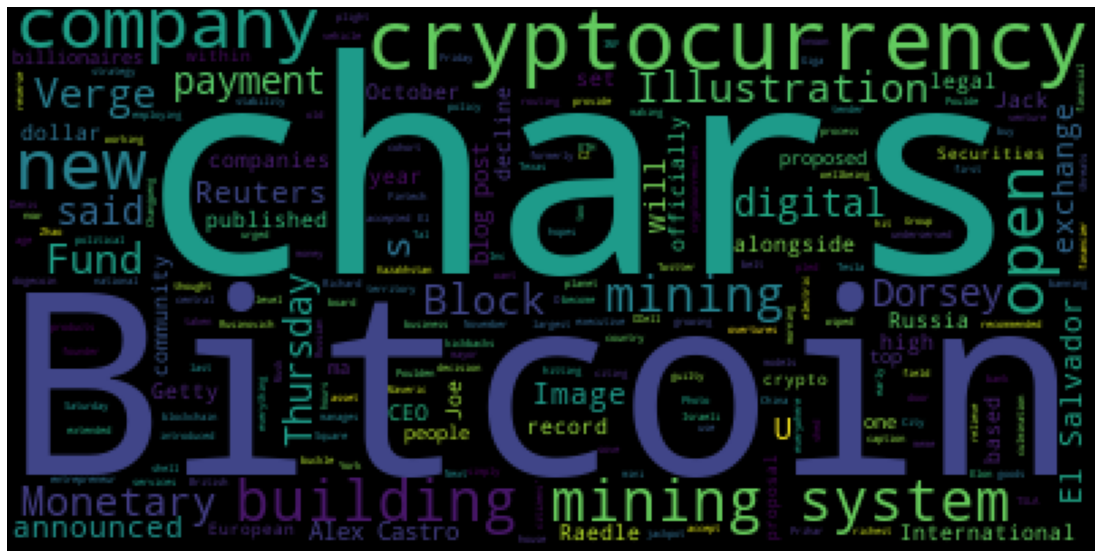

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(btc_sentiments.text.str.cat())
plt.imshow(wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

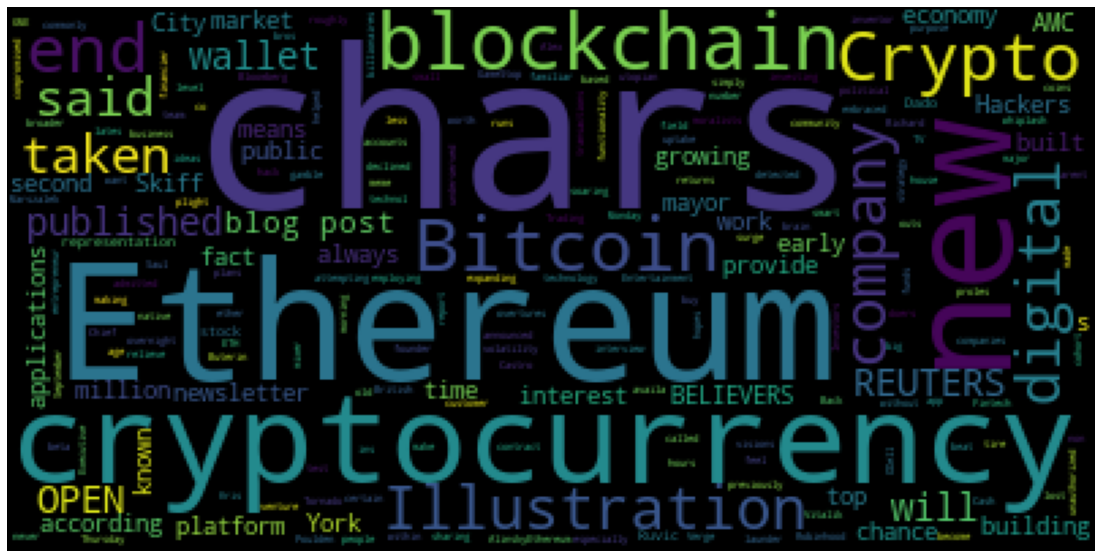

In [28]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(eth_sentiments.text.str.cat())
plt.imshow(wc)
plt.axis("off")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_concat = btc_sentiments.text.str.cat()
btc_concat

'When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars]Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars]In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a b

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
# Set article to be analyzed with spaCy
btc_doc = nlp(btc_concat)
# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data['title'] = "Bitcoin"

In [34]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [35]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in btc_doc.ents]) 

['Denis Rusinovich', 'Maveric Group', 'Kazakhstan', '2017', 'China', 'Russia', 'chars]El Salvador', 'Bitcoin', 'US', '2021', 'Alex Castro', 'Verge', 'The International Monetary Fund’s', 'El …', 'Joe Raedle', 'Square', 'Tal Prihar', 'Alex Castro', 'The Verge\r\n', 'two-year', '4,836', 'ETH', '443', 'Alex Castro', 'The Verge\r\n', 'the early hours of Thursday', 'morning', 'Saturday', 'more than 50%', 'November', 'more than $', 'Jack Dorsey', 'Twitter', 'first', 'October last year', 'Elon Musk', 'Friday', 'Fintech', 'New York City', 'Richard ODell Poulden', 'October', 'Poulde', 'chars]Russia', 'Thursday', 'Russian', 'El Salvador', 'US', 'The International Monetary Fund', 'El Salvador', 'Changpeng', 'Zhao', 'Binance', 'Reuters', 'Jan 26', 'Reuters', 'The U.S. Securities and Exchange Commission', 'Thursday', 'Fidelitys Wise Origin Bitcoin', '+202', 'Dorsey', 'June', 'Joe Raedle/', 'this week', 'September', 'Robinhood', 'Crypto.com', 'about $34 million', 'Monday', 'overnight', 'European Secu

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_concat = eth_sentiments.text.str.cat()
eth_concat

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars]On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars]Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars]Trading platform Crypto.com lost about $34 million worth of cryptocurrency in a hack on Monday, according to a new blog post by the compa

In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
# Set article to be analyzed with spaCy
eth_doc = nlp(eth_concat)
# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data['title'] = "Ethereum"

In [38]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [39]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in eth_doc.ents]) 

['4,836', 'ETH', '443', 'Alex Castro', 'The Verge\r\n', 'the early hours of Thursday', 'morning', 'roughly $15 million', 'Crypto.com', 'Tornado Cash', 'Fintech', 'New York City', 'September', 'Robinhood', 'Crypto.com', 'about $34 million', 'Monday', 'overnight', 'Saul AlinskyEthereum', 'Ethereum', 'Ethereum', '418%', '2021', 'AMC Entertainment', 'AMC', 'GameStop', 'GME', 'Ethereums', 'more than 650%', 'utopian', 'Vitalik Buterin', 'Ethereum', 'OPEN', 'second', 'OPEN', 'second', 'Bloomberg TV', 'Crypto.com', 'Kris Marszalek', '400', 'Richard ODell Poulden', 'October', 'Poulde', 'TIME', 'Metaverse', 'weekly', 'Vita', 'York City', 'Eric Adams', 'first', 'Friday', 'Bitcoin and Ethereum', 'Coinbase Global Inc.', 'U.S.', 'Skiff', 'MetaMask', 'Skiff', 'Ethereum', 'January 8, 2021', 'REUTERS', 'Dado Ruvic/File PhotoJan', '21', 'Reuters', '9.28%', '36', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/Illustration\r\n', 'MOSCOW', 'Jan', 'Fed']


---